[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/2a9j8rnk)

# Métricas de Clasificación

En este notebook, exploraremos el uso de métricas de clasificación en dos escenarios diferentes: uno con un dataset balanceado y otro con un **dataset desbalanceado**. A través de estos ejemplos, se ilustrará cómo las métricas comunes de clasificación pueden ayudar a evaluar el rendimiento de modelos en diferentes contextos.

El objetivo principal es proporcionar una comprensión clara de cómo interpretar estas métricas, destacando la importancia de elegir las métricas adecuadas según la naturaleza del problema y la distribución de las clases. Se presentarán las siguientes métricas:

- Matriz de Confusión
- Precisión (Accuracy)
- Precisión (Precision)
- Recall
- F1-Score

Además, analizaremos cómo los modelos de clasificación pueden comportarse de manera diferente dependiendo de si los datos están balanceados o desbalanceados, y cómo estas métricas pueden revelar aspectos importantes del rendimiento del modelo que no siempre son evidentes con una sola métrica. Al final de este notebook, se espera que puedas interpretar y aplicar correctamente estas métricas para tomar decisiones informadas sobre la calidad de un modelo de clasificación.

**Nota**: Este notebook se enfocará en el dataset desbalanceado.

In [1]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [2]:
import os

In [3]:
if IN_COLAB:
    # download a folder from github
    if not os.path.exists('datasets_github'):
        !wget -q -O repositorio.zip https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
        !unzip -q repositorio.zip
        !mv CienciaDatos-MASDI-main/Seccion_3/dataset_sintetico datasets_github 
        !mv CienciaDatos-MASDI-main/Seccion_3/datasetanalyser.py datasetanalyser.py 
        !rm -rf repositorio.zip CienciaDatos-MASDI-main
        print("Archivos descargados y extraídos correctamente.")
    else:
        print("Archivos ya descargados y extraídos.")

In [4]:
dataset_sintetico_path = os.path.join(os.getcwd(), 'dataset_sintetico')

# 1. Análisis de los Datos

## 1.1. Cargar los Datos

Una clínica que desea predecir la gravedad de la diabetes en pacientes basándose en ciertas características médicas. La clasificación se realiza en tres niveles de gravedad:

- Sin Diabetes (Clase 0)
- Diabetes Moderada (Clase 1)
- Diabetes Severa (Clase 2)

La mayoría de los pacientes que visitan la clínica no tienen diabetes, mientras que hay un número menor que presenta síntomas moderados y un grupo aún más reducido que tiene casos severos. Esto crea un dataset desbalanceado, ya que las clases no están distribuidas equitativamente.

**Atributos del dataset:**

- Edad:
  - Tipo: Numérica continua
  - Descripción: Representa la edad del paciente en años. La diabetes se correlaciona a menudo con la edad, por lo que esta característica puede ayudar a predecir la condición.

- Índice de Masa Corporal (IMC):
  - Tipo: Numérica continua
  - Descripción: Calcula el peso del paciente en relación con su altura. Un IMC elevado puede ser un factor de riesgo significativo para la diabetes.

- Glucosa en Ayunas:
  - Tipo: Numérica continua
  - Descripción: Medición de la glucosa en la sangre después de un período de ayuno. Niveles altos pueden indicar problemas de azúcar en la sangre.

- Historial Familiar:
  - Tipo: Numérica discreta
  - Descripción: Número de familiares directos que han sido diagnosticados con diabetes. Tener antecedentes familiares puede aumentar el riesgo.

- Nivel de Actividad Física:
  - Tipo: Numérica continua (valor entre 0 y 1)
  - Descripción: Un puntaje que mide la actividad física del paciente (0 = sedentario, 1 = muy activo). La actividad física regular puede ayudar a reducir el riesgo de diabetes.


- Variable Objetivo
  - Gravedad_Diabetes:
    - Tipo: Categórica (0, 1, 2)
  - Descripción: Variable objetivo que indica la gravedad de la condición del paciente:
    - 0 = Sin Diabetes
    - 1 = Diabetes Moderada
    - 2 = Diabetes Severa

In [9]:
# Importamos la biblioteca pandas
import pandas as pd
# definimos la ruta del dataset a cargar
datasets_folder_name = '/content/datasets_github' if IN_COLAB else dataset_sintetico_path
ruta_dataset = os.path.join(datasets_folder_name, 'dataset_2_gravedad_diabetes_sintetico_.csv')
# Cargamos el dataset
df1_diabetes = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
df1_diabetes.head()

,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
0,29,27.5,131,0,1.00,1
1,47,23.1,101,0,1.00,0
2,46,24.4,106,0,0.59,0
3,36,21.9,93,0,1.00,2
4,57,32.5,97,2,1.00,0


## 1.2. Explorar los Datos

Realiza un análisis exploratorio inicial para entender la estructura y el contenido del dataset. Esto incluye revisar el tipo de datos, el número de entradas, y estadísticas básicas para cada variable.

### Paso 1.3: Comprobar Datos Faltantes o Anómalos
Verifica si hay valores faltantes y observa si hay valores fuera de los rangos esperados. Esto ayudará a identificar datos que necesiten limpieza o ajustes.

### Paso 1.4: Análisis Univariado
Examina cada característica por separado para entender su distribución. Utiliza histogramas y diagramas de caja para visualizar la variabilidad de cada característica.

### Paso 1.5: Análisis Bivariado
Examina cómo se relacionan las características con la variable objetivo `Gravedad_Diabetes`. Utiliza diagramas de dispersión y gráficos de violín para visualizar relaciones y patrones entre variables.

### Paso 1.6: Análisis de Correlación
Verifica las correlaciones entre las características para identificar posibles relaciones que puedan ser importantes en el análisis. Esto puede ayudar a reducir la multicolinealidad y seleccionar las características más relevantes.

### Paso 1.7: Conclusiones Iniciales del Análisis
Resume los hallazgos clave de la exploración de los datos. Identifica características que distingan claramente los diferentes niveles de interés y patrones generales que podrías aprovechar en el modelado predictivo.

### Paso 1.8: Visualizaciones Adicionales para Insights
Crea visualizaciones adicionales si observaste patrones interesantes que merecen ser destacados. Estas visualizaciones pueden ayudar a comunicar mejor los resultados del análisis y proporcionar insights más profundos.

In [10]:
## 1.2. Exploración de los datos

# Información general del dataset
df1_diabetes.info()

# Resumen estadístico de las variables numéricas
df1_diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                2000 non-null   int64  
 1   IMC                 2000 non-null   float64
 2   Glucosa_Ayunas      2000 non-null   int64  
 3   Historial_Familiar  2000 non-null   int64  
 4   Nivel_Actividad     2000 non-null   float64
 5   Gravedad_Diabetes   2000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 93.9 KB


,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.338000,27.630450,109.208500,1.145500,0.532215,0.408500
std,11.736167,5.081063,20.139832,0.847165,0.415054,0.671456
min,18.000000,15.000000,70.000000,0.000000,0.000000,0.000000
25%,33.000000,24.600000,95.000000,0.000000,0.000000,0.000000
50%,41.000000,28.100000,109.000000,1.000000,0.590000,0.000000
75%,54.000000,31.200000,123.000000,2.000000,1.000000,1.000000
max,80.000000,39.800000,175.000000,2.000000,1.000000,2.000000


In [11]:
df1_diabetes['Gravedad_Diabetes'].value_counts()

Gravedad_Diabetes
0    1392
1     399
2     209
Name: count, dtype: int64

**Conclusión**

- Se observa que todos los atributos son de tipo numérico y no hay valores faltantes en el dataset.
- Las variables se encuentran en diferentes rangos, por lo que normalizarlas puede ser útil para el modelado.
- Existen 5 variables predictoras y una variable objetivo con 3 clases.
- Las clases de la variable objetivo están desbalanceadas, con la clase 0 siendo la más común y la clase 2 la menos común.

## 1.3: Comprobar Datos Faltantes o Anómalos
Verifica si hay valores faltantes y observa si hay valores fuera de los rangos esperados. Esto ayudará a identificar datos que necesiten limpieza o ajustes.


In [12]:
# recargar archivos .py externos de forma automática
%load_ext autoreload
%autoreload 2

In [13]:
# se importará la clase creada para la limpieza de datos
from datasetanalyser import DatasetAnalyzer

In [14]:
analyzer = DatasetAnalyzer(df1_diabetes)

In [15]:
analyzer.check_missing_and_anomalies()

Valores faltantes por columna:
Edad                  0
IMC                   0
Glucosa_Ayunas        0
Historial_Familiar    0
Nivel_Actividad       0
Gravedad_Diabetes     0
dtype: int64

Valores negativos detectados en columnas numéricas:


No se encontraron valores faltantes en el dataset, lo que es un buen indicador de la calidad de los datos.

## 1.4: Análisis Univariado

Examina cada característica por separado para entender su distribución. Utiliza histogramas y diagramas de caja para visualizar la variabilidad de cada característica.

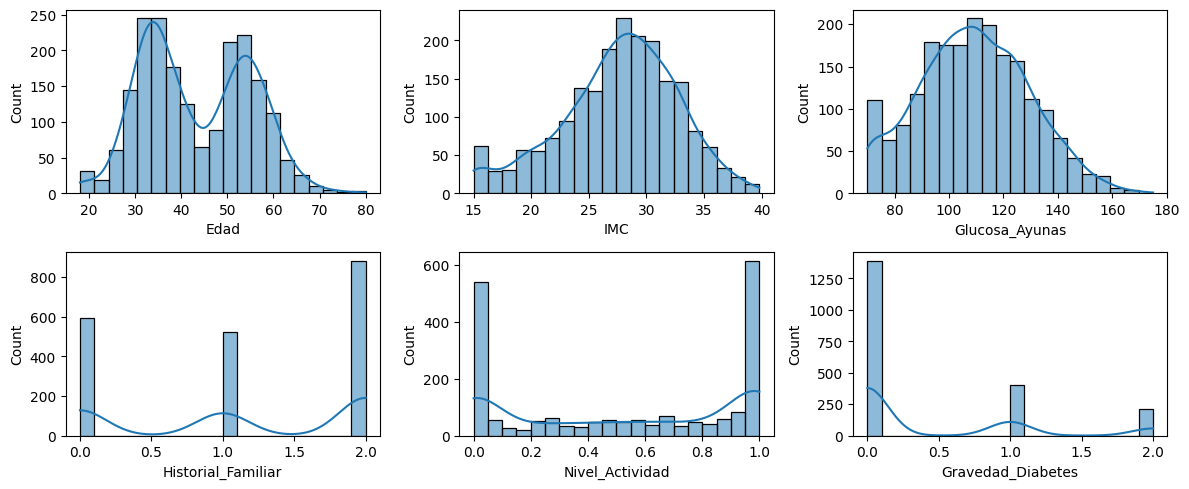

In [16]:
analyzer.univariate_analysis(plot_type='histogram', fig_size=(12, 5))

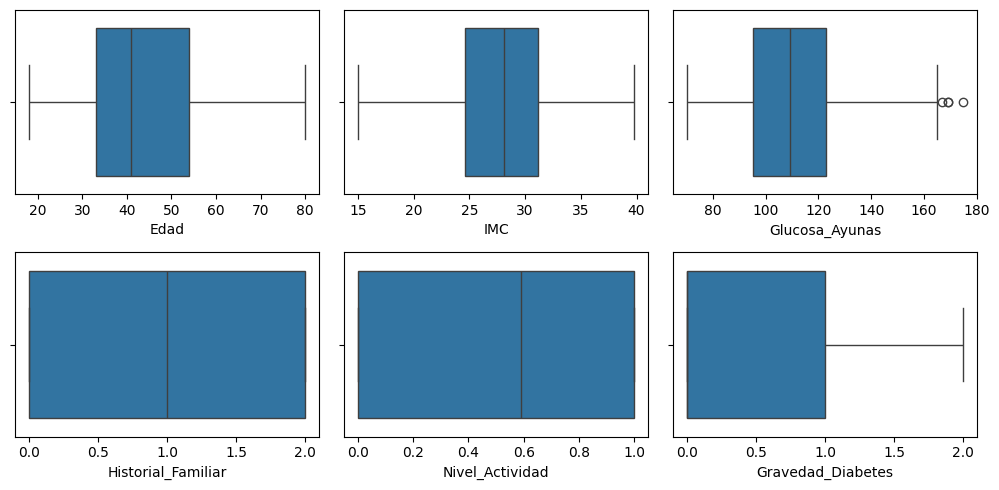

In [17]:
analyzer.univariate_analysis(plot_type='boxplot', fig_size=(10, 5))

**Conclusiones del Análisis Univariado**




**Conclusiones Generales del Análisis Univariado**



## 1.5: Análisis Bivariado
Examina cómo se relacionan las características con la variable objetivo `Nivel_Interes`. Utiliza diagramas de dispersión y gráficos de violín para visualizar relaciones y patrones entre variables.

In [19]:
df1_diabetes

,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
0,29,27.5,131,0,1.00,1
1,47,23.1,101,0,1.00,0
2,46,24.4,106,0,0.59,0
3,36,21.9,93,0,1.00,2
4,57,32.5,97,2,1.00,0
...,...,...,...,...,...,...
1995,35,19.0,70,2,0.00,2
1996,26,37.3,109,2,0.68,0
1997,34,28.8,102,0,0.29,0
1998,35,26.9,140,0,0.00,0


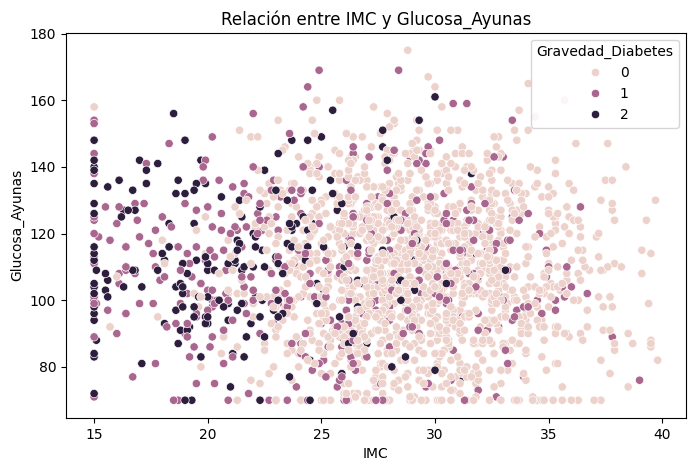

In [25]:
analyzer.bivariate_analysis("IMC", "Glucosa_Ayunas", hue="Gravedad_Diabetes", plot_type='scatter')

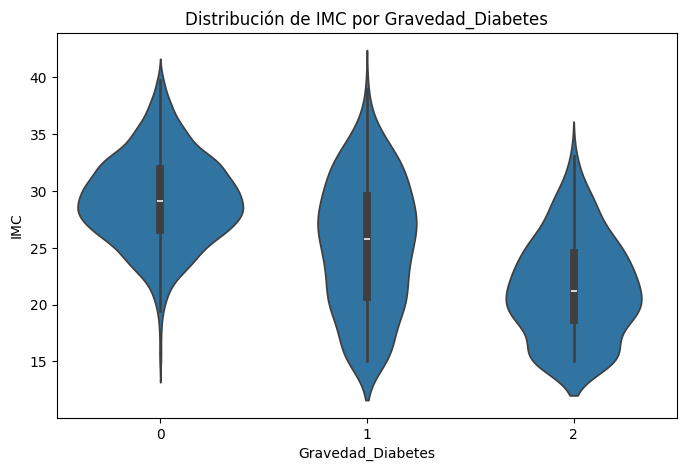

In [22]:
analyzer.bivariate_analysis("Gravedad_Diabetes", "IMC", plot_type='violin')

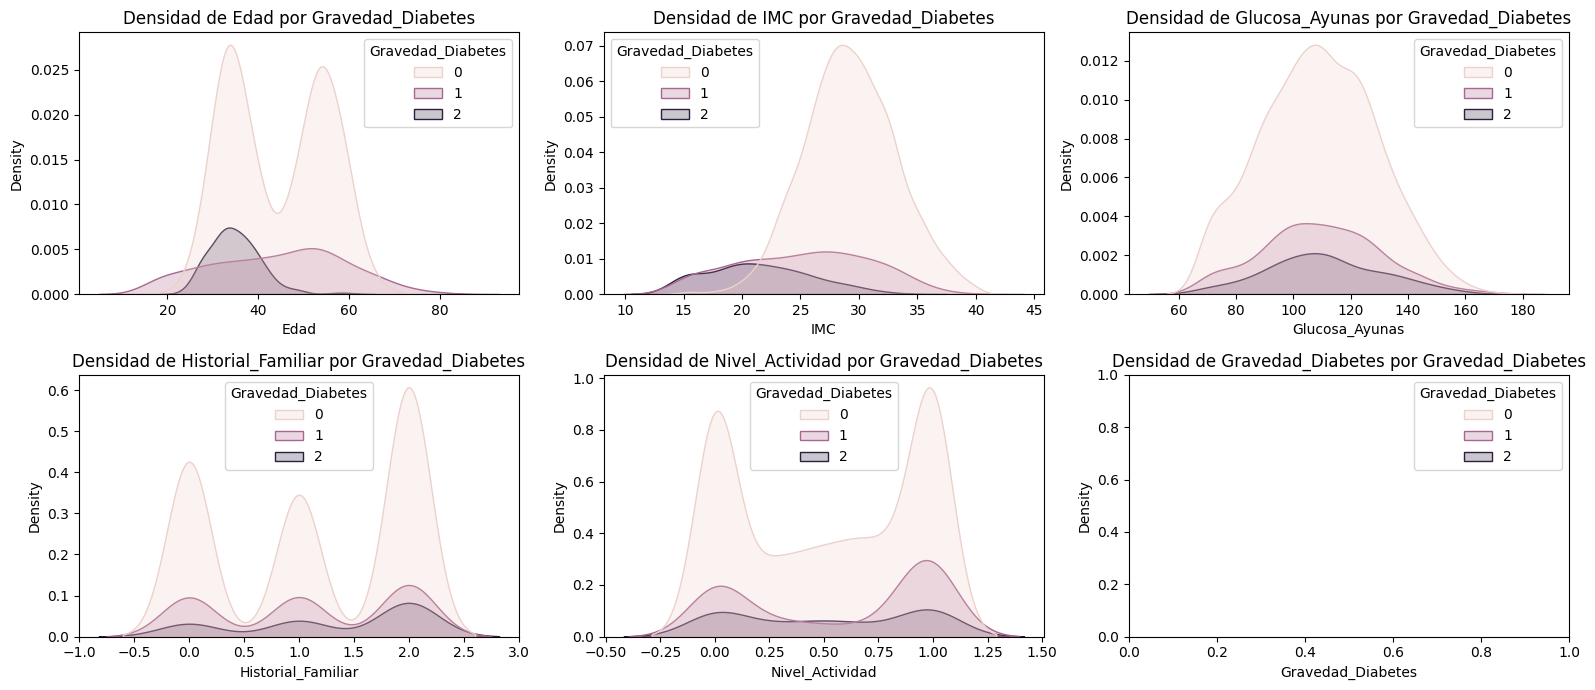

In [26]:
analyzer.density_analysis(target_col="Gravedad_Diabetes", fig_size=(16, 7))

**Análisis Bivariado Simplificado**



**Conclusiones Generales**


## 1.6: Análisis de Correlación
Verifica las correlaciones entre las características para identificar posibles relaciones que puedan ser importantes en el análisis. Esto puede ayudar a reducir la multicolinealidad y seleccionar las características más relevantes.

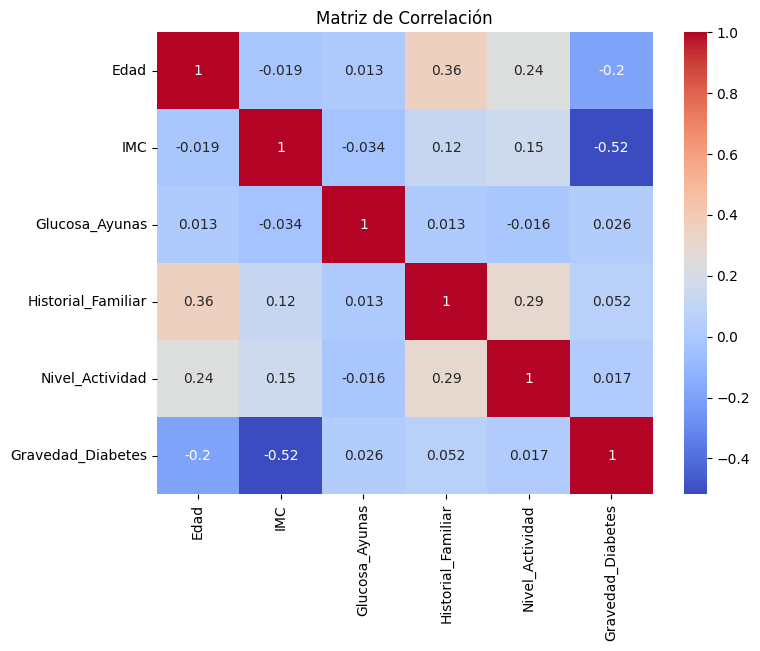

In [27]:
analyzer.correlation_analysis(fig_size=(8, 6))

**Análisis de la Matriz de Correlación**

La **matriz de correlación** muestra las relaciones lineales entre las diferentes características del dataset. Aquí se destacan las correlaciones significativas que pueden ser útiles para interpretar patrones en los datos:




## 1.7: Conclusiones del Análisis

1. **Distribuciones Asimétricas**: Las variables de ingreso anual y gasto promedio muestran distribuciones asimétricas, lo que indica que hay una minoría de clientes con ingresos y gastos significativamente más altos que el promedio.
2. **Valores Atípicos**: Se identificaron valores atípicos en el ingreso anual, gasto promedio y productos anteriores, lo que sugiere la presencia de clientes especiales que podrían requerir un análisis más detallado.
3. **Agrupaciones Claras**: La puntuación de interés y el nivel de interés muestran agrupaciones bien definidas, lo que podría ser útil para segmentar a los clientes y diseñar estrategias de marketing específicas.
4. **Variedad de Comportamientos**: El gasto promedio tiene una distribución multimodal, lo que sugiere que existen diferentes grupos de comportamiento de clientes con hábitos de gasto distintos.
5. **Correlaciones Clave**: Se identificaron correlaciones significativas entre el gasto promedio, la puntuación de interés y el nivel de interés, lo que sugiere que estos atributos podrían ser importantes para predecir el comportamiento del cliente.
6. **Relevancia de las Variables**: Algunas variables, como la edad, mostraron correlaciones bajas con otras características, lo que sugiere que su impacto en el comportamiento del cliente es limitado.

# 2. Preparación de los Datos

Antes de construir y evaluar modelos de clasificación, es importante preparar los datos para el análisis. Esto incluye la normalización de las características, la codificación de variables categóricas y la división del dataset en conjuntos de entrenamiento y prueba.

- Normalización de Características
- Remoción de Variables Redundantes
- División del Dataset

## 2.1: Normalización de Características

Dado que las características del dataset tienen diferentes escalas y rangos, es útil normalizarlas para que tengan una distribución más uniforme. Esto puede mejorar el rendimiento de los modelos de clasificación y facilitar la interpretación de los coeficientes.

In [28]:
df1_diabetes.head()

,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
0,29,27.5,131,0,1.00,1
1,47,23.1,101,0,1.00,0
2,46,24.4,106,0,0.59,0
3,36,21.9,93,0,1.00,2
4,57,32.5,97,2,1.00,0


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1_diabetes_scaled = df1_diabetes.copy()
df1_diabetes_scaled[["Edad", "IMC", "Glucosa_Ayunas", "Nivel_Actividad"]] = scaler.fit_transform(df1_diabetes[["Edad", "IMC", "Glucosa_Ayunas", "Nivel_Actividad"]])

df1_diabetes_scaled.describe()

,Edad,IMC,Glucosa_Ayunas,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.408677,0.509292,0.373414,1.145500,0.532215,0.408500
std,0.189293,0.204882,0.191808,0.847165,0.415054,0.671456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241935,0.387097,0.238095,0.000000,0.000000,0.000000
50%,0.370968,0.528226,0.371429,1.000000,0.590000,0.000000
75%,0.580645,0.653226,0.504762,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000


## 2.2: Remoción de Variables Redundantes

Para evitar la multicolinealidad y reducir la complejidad del modelo, es útil eliminar variables redundantes o altamente correlacionadas. En este caso, se eliminará la variable `Edad` y `Productos_Anteriores` debido a su baja correlación con las demás características.

In [30]:
df1_diabetes_scaled.drop(columns=["Edad", "Glucosa_Ayunas"], inplace=True)
df1_diabetes_scaled.head()

,IMC,Historial_Familiar,Nivel_Actividad,Gravedad_Diabetes
0,0.504032,0,1.00,1
1,0.326613,0,1.00,0
2,0.379032,0,0.59,0
3,0.278226,0,1.00,2
4,0.705645,2,1.00,0


## 2.4: División del Dataset

Para evaluar el rendimiento de los modelos de clasificación, es necesario dividir el dataset en conjuntos de entrenamiento y prueba. Esto permite entrenar los modelos en una parte de los datos y evaluar su rendimiento en una parte independiente. En este caso, se utilizará una proporción de 80% para entrenamiento y 20% para prueba.

In [37]:
from sklearn.model_selection import train_test_split

X = df1_diabetes_scaled.drop(columns=["Gravedad_Diabetes"])
y = df1_diabetes_scaled["Gravedad_Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 3), (400, 3), (1600,), (400,))

# 3. Construcción y Evaluación de Modelos

Se utilizará el modelo random forest para clasificar a los clientes en los tres niveles de interés. Luego, se evaluará el rendimiento del modelo utilizando métricas de clasificación comunes, como la matriz de confusión, la precisión, el recall, el F1-score.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 3.1: Construcción del Modelo

In [39]:
# Cargar el modelo - Se usan los hiperparámetros por defecto
rf_model = RandomForestClassifier()

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicciones
y_pred = rf_model.predict(X_test)

## 3.2: Evaluación del Modelo

### 3.2.1: Matriz de Confusión

In [40]:
# matriz de confusión con seaborn heatmap 
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels: list, figsize=(8, 6)):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

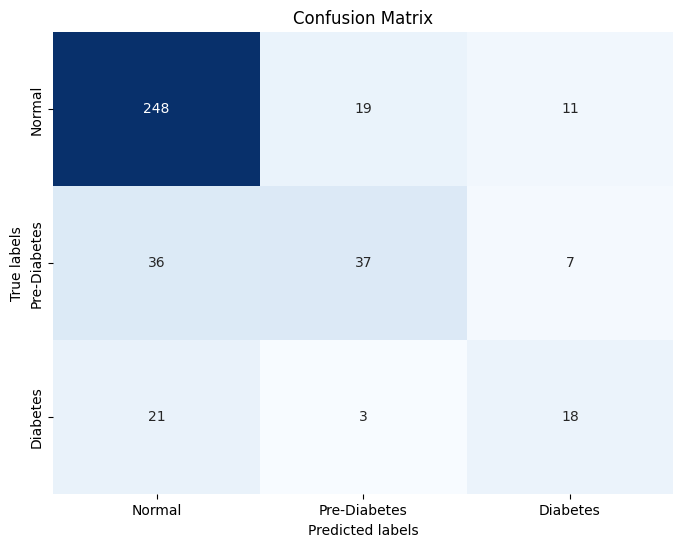

In [41]:
labels = ["Normal", "Pre-Diabetes", "Diabetes"]
conf_matrix = plot_confusion_matrix(y_test, y_pred, labels)

### 3.2.2: Reporte de Clasificación


In [42]:
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      Normal       0.81      0.89      0.85       278
Pre-Diabetes       0.63      0.46      0.53        80
    Diabetes       0.50      0.43      0.46        42

    accuracy                           0.76       400
   macro avg       0.65      0.59      0.61       400
weighted avg       0.74      0.76      0.75       400



## 3.3: Interpretación de las Métricas

### 3.3.1: Interpretación de la Matriz de Confusión




### 3.3.2: Análisis del Reporte de Clasificación



# Pregruntas

1. ¿Por qué es importante considerar las métricas de clasificación en un dataset desbalanceado?
2. ¿Qué métricas son más adecuadas para evaluar el rendimiento de un modelo en un dataset desbalanceado?
3. ¿Cómo se pueden interpretar las métricas de precisión, recall y F1-score en el contexto de un problema de clasificación?
4. ¿Qué estrategias se pueden utilizar para mejorar el rendimiento de un modelo en un dataset desbalanceado?
5. ¿Qué metodologías se podrían aplicar para mejorar el modelo actual, considerando las limitaciones del dataset? 
   1. (pista: ajuste de hiperparámetros, selección de características, etc.)
6. **¿Podría confiar en el resultado del modelo actual despues de haberlo entrenado una sola vez?**
7. 

# Consistencia del Modelo

In [43]:
# run the training for 5 times and get the average accuracy score, each time with a different random state
from sklearn.metrics import accuracy_score
import numpy as np

accuracy_scores = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

avg_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Average accuracy: {avg_accuracy:.2f} +/- {std_accuracy:.2f}")    


Average accuracy: 0.79 +/- 0.01
